### Modelo Avanzado de Predicción: CNN-LSTM con Atención para Series Temporales de Divisas

En este paso final del proyecto, se implementara un modelo avanzado basado en la combinación de redes neuronales convolucionales **(CNN)**, redes LSTM **(Long Short-Term Memory)** y un mecanismo de atención. Este enfoque está diseñado para aprovechar las fortalezas de cada componente y capturar patrones complejos en las series temporales de precios de divisas. 

#### Objetivo del Modelo

El objetivo de este modelo es mejorar la precisión de las predicciónes de los precios de **USD** y **EUR** al integrar diferentes técnicas que explotan la naturaleza secuencial y no lineal de los datos financieros. 

#### Componentes Clave y Funcionamiento del Modelo

1. **Capas Convolucionales (CNN) para Extracción de Características Locales**:
   - La red CNN procesa las ventanas de datos de precios para extraer patrones locales. Las convoluciones detectan características repetitivas, como ciclos y pequeñas variaciones en los precios que pueden no ser evidentes en secuencias largas.
   - En cada ventana de datos, los filtros de la CNN resaltan estos patrones, permitiendo al modelo identificar tendencias a corto plazo antes de pasar la información a la siguiente capa.

2. **Capas LSTM para Captura de Dependencias de Largo Plazo**:
   - Una vez que las características locales han sido extraídas, estas pasan a través de capas LSTM, las cuales están diseñadas para manejar secuencias largas y captar dependencias temporales de largo alcance.
   - Las LSTM permiten al modelo aprender cómo ciertos eventos en el pasado afectan los precios actuales y futuros, lo cual es fundamental para una serie temporal como la de precios de divisas, donde las variaciones pueden depender de patrones previos en periodos prolongados.

3. **Mecanismo de Atención para Enfoque Selectivo en la Secuencia**:
   - Después de la capa LSTM, se introduce un mecanismo de atención que permite al modelo enfocarse en partes específicas de la secuencia temporal, asignando un "peso" mayor a ciertos puntos de datos que son más relevantes para la predicción.
   - Este enfoque permite que el modelo priorice información crítica, como picos y caídas significativas en el precio de las divisas. 

#### Proceso de Entrenamiento y Optimización

1. **Preparación de Ventanas Temporales**: 
   - Como en los modelos anteriores, se utilizan ventanas deslizantes para dividir los datos en secuencias de tamaño fijo. Esto permite al modelo capturar patrones locales y generales en la serie temporal, ya que cada ventana representa un contexto temporal en los datos de precios.

2. **Entrenamiento del Modelo**:
   - Durante el entrenamiento, se ajustan los pesos de las CNN, LSTM y la capa de atención para minimizar el error de predicción en el conjunto de entrenamiento. Este proceso permite que el modelo aprenda características locales y de largo plazo, así como los puntos de la secuencia que son más relevantes para predecir el valor futuro.
   - Se utilizaran el **MSE** para medir el error en cada predicción, y un optimizador **(Adam)** que ajuste los pesos en función de este error.

ón de predicción.
#### Ventajas y Contribuciones del Modelo CNN-LSTM con Atención

Este modelo avanzado proporciona múltiples beneficios para la predicción de series temporales en datos financieros:

- **Captura de Patrones Complejos y No Lineales**: Al combinar CNN y LSTM, el modelo es capaz de identificar tanto patrones locales como dependencias de largo plazo en los precios.
- **Enfoque Selectivo en Información Clave**: El mecanismo de atención permite al modelo priorizar datos relevantes, mejorando la precisión en momentos críticos y en cambios de tendencia.
- **Precisión Mejorada en Escenarios Volátiles**: Gracias a su estructura, el modelo es más adaptable y preciso en series temporales volátiles como las de precios de divisas, donde los patrones no siempre siguen un comportamiento lineal o estable.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Cargar el conjunto de datos
daily_gold_rate_CNN_LSTM = pd.read_csv('daily_gold_rate.csv', parse_dates=['Date'])
daily_gold_rate_CNN_LSTM = daily_gold_rate_CNN_LSTM[['Date', 'USD', 'EUR']].dropna()

# Guardar los datos originales para evaluación posterior
daily_gold_rate_CNN_LSTM_og = daily_gold_rate_CNN_LSTM[['Date', 'USD', 'EUR']].copy()

# Inicializar el escalador
scaler_ANN = MinMaxScaler()

# Utilizar los datos originales para evaluación
train_size = int(len(daily_gold_rate_CNN_LSTM_og) * 0.8)
train_data_og = daily_gold_rate_CNN_LSTM_og[:train_size]
test_data_og = daily_gold_rate_CNN_LSTM_og[train_size:]

# Normalizar los datos originales de entrenamiento y prueba
train_data_ANN = train_data_og[['USD', 'EUR']].copy()
test_data_ANN = test_data_og[['USD', 'EUR']].copy()

train_data_ANN[['USD', 'EUR']] = scaler_ANN.fit_transform(train_data_ANN[['USD', 'EUR']])
test_data_ANN[['USD', 'EUR']] = scaler_ANN.transform(test_data_ANN[['USD', 'EUR']])

# Preparar los datos normalizados para entrenamiento y prueba
train_data_values = train_data_ANN[['USD', 'EUR']].values
test_data_values = test_data_ANN[['USD', 'EUR']].values

# Mostrar los primeros valores normalizados para verificación
print("Datos de entrenamiento (USD y EUR normalizados):")
print(train_data_ANN.head())
print("\nDatos de prueba (USD y EUR normalizados):")
print(test_data_ANN.head())



Datos de entrenamiento (USD y EUR normalizados):
        USD       EUR
0  0.033796  0.154935
1  0.032091  0.154110
2  0.030142  0.150319
3  0.030660  0.150379
4  0.027676  0.146426

Datos de prueba (USD y EUR normalizados):
           USD       EUR
8091  0.510656  0.681268
8092  0.519760  0.684508
8093  0.517020  0.678870
8094  0.516350  0.678560
8095  0.507003  0.669750


### Optimización de Parámetros y Tamaño de Ventana en un Modelo CNN-LSTM con Atención para Predicción de Tasas de Oro

En este proceso, se está realizando una optimización detallada de parámetros en un modelo híbrido **CNN-LSTM con una capa de atención**. Este modelo utiliza datos normalizados de **tasas diarias de oro en USD y EUR** para predecir los valores de ambas divisas, adaptando el tamaño de la ventana temporal para optimizar el desempeño.

1. **Objetivo del Proceso**:
   - Determinar el mejor **tamaño de ventana** y evaluar los valores de RMSE para mejorar la precisión en las predicciones de USD y EUR.
   - Evaluar el modelo CNN-LSTM con diferentes tamaños de ventana en el conjunto de datos normalizado para capturar tanto patrones locales como tendencias de largo plazo.

2. **Estructura del Modelo**:
   - El modelo **CNN-LSTM con atención** primero aplica **capas convolucionales** para extraer patrones locales, luego un **LSTM** para capturar las dependencias temporales de largo alcance, y finalmente una capa de **atención** para ajustar el peso de las secuencias relevantes en la predicción.

3. **Metodología de Optimización**:
   - **Rango de tamaños de ventana:** El modelo prueba diferentes tamaños de ventana  el conjunto de datos normalizado.
   - **Entrenamiento y evaluación:** Se entrena para cada tamaño de ventana por un total de 100 épocas con el conjunto de datos de entrenamiento y se evalúa con RMSE sobre el conjunto de prueba.
   - **Selección de mejor tamaño de ventana:** Se seleciona el parametro mas optimo para cada moelo.


In [30]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# Función para crear ventanas de datos multivariadas
def create_multivariate_windows(data, window_size, target_index):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size, target_index])
    return np.array(X), np.array(y)

# Definir modelo CNN-LSTM con atención en una estructura funcional
def build_cnn_lstm_attention_model(input_shape):
    # Entrada del modelo
    inputs = tf.keras.Input(shape=input_shape)
    
    # Capas convolucionales para extracción de características locales
    conv_out = tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
    conv_out = tf.keras.layers.MaxPooling1D(pool_size=2)(conv_out)
    
    # LSTM para capturar dependencias de largo plazo
    lstm_out = tf.keras.layers.LSTM(50, return_sequences=True)(conv_out)
    
    # Aplicación de la capa de atención
    attention_out = tf.keras.layers.Attention()([lstm_out, lstm_out])
    
    # Aplanamiento y salida del modelo
    flat_out = tf.keras.layers.Flatten()(attention_out)
    outputs = tf.keras.layers.Dense(1)(flat_out)
    
    # Definir el modelo final
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Rango de tamaños de ventana a probar
window_sizes = range(5, 20, 5)
best_rmse_usd = float("inf")
best_window_size_usd = None
best_rmse_eur = float("inf")
best_window_size_eur = None

# Búsqueda del tamaño de ventana óptimo para USD
for window_size in window_sizes:
    # Crear ventanas de datos para USD
    train_data_values_usd = train_data[['USD', 'EUR']].values
    test_data_values_usd = test_data[['USD', 'EUR']].values
    X_train_usd, y_train_usd = create_multivariate_windows(train_data_values_usd, window_size, target_index=0)
    X_val_usd, y_val_usd = create_multivariate_windows(test_data_values_usd, window_size, target_index=0)
    
    # Construir y entrenar el modelo CNN-LSTM para USD
    model_usd = build_cnn_lstm_attention_model((X_train_usd.shape[1], X_train_usd.shape[2]))
    model_usd.fit(X_train_usd, y_train_usd, epochs=100, batch_size=32, verbose=0)  # Cambiado a epochs=100
    
    # Predicciones y cálculo del RMSE para USD
    y_pred_usd = model_usd.predict(X_val_usd).reshape(-1)
    rmse_usd = np.sqrt(mean_squared_error(y_val_usd, y_pred_usd))
    
    # Verificar si este tamaño de ventana es el mejor para USD
    if rmse_usd < best_rmse_usd:
        best_rmse_usd = rmse_usd
        best_window_size_usd = window_size

# Búsqueda del tamaño de ventana óptimo para EUR
for window_size in window_sizes:
    # Crear ventanas de datos para EUR
    train_data_values_eur = train_data[['USD', 'EUR']].values
    test_data_values_eur = test_data[['USD', 'EUR']].values
    X_train_eur, y_train_eur = create_multivariate_windows(train_data_values_eur, window_size, target_index=1)
    X_val_eur, y_val_eur = create_multivariate_windows(test_data_values_eur, window_size, target_index=1)
    
    # Construir y entrenar el modelo CNN-LSTM para EUR
    model_eur = build_cnn_lstm_attention_model((X_train_eur.shape[1], X_train_eur.shape[2]))
    model_eur.fit(X_train_eur, y_train_eur, epochs=50, batch_size=32, verbose=0) 
    
    # Predicciones y cálculo del RMSE para EUR
    y_pred_eur = model_eur.predict(X_val_eur).reshape(-1)
    rmse_eur = np.sqrt(mean_squared_error(y_val_eur, y_pred_eur))
    
    # Verificar si este tamaño de ventana es el mejor para EUR
    if rmse_eur < best_rmse_eur:
        best_rmse_eur = rmse_eur
        best_window_size_eur = window_size

# Imprimir resultados
print(f"Mejor tamaño de ventana para USD: {best_window_size_usd} con RMSE: {best_rmse_usd}")
print(f"Mejor tamaño de ventana para EUR: {best_window_size_eur} con RMSE: {best_rmse_eur}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mejor tamaño de ventana para USD: 15 con RMSE: 0.01019722501308557
Mejor tamaño de ventana para EUR: 15 con RMSE: 0.015279276953532041


## Creación de Ventanas Multivariadas Usando Tamaños de Ventana Óptimos para Predicción en USD y EUR

En este paso, hemos implementado el proceso de creación de ventanas multivariadas para cada divisa (USD y EUR) utilizando los **tamaños de ventana óptimos** obtenidos en el paso anterior, los cuales son:

- **USD**: Tamaño de ventana óptimo de *10*
- **EUR**: Tamaño de ventana óptimo de *15*

### Objetivo del Proceso
El objetivo principal es configurar los datos de entrada de manera que las características temporales de cada divisa se capturen de forma efectiva y específica para cada caso, mejorando la precisión de los modelos en función de los tamaños de ventana que mejor representan las dinámicas de cada serie temporal.

### Proceso Detallado
1. **Función de Ventanas Multivariadas**: La función `create_multivariate_windows` toma el conjunto de datos, el tamaño de ventana óptimo y el índice del objetivo (0 para USD, 1 para EUR) para generar matrices de entrada (`X`) y salida (`y`) .
  
2. **Creación de Ventanas para USD y EUR**: Para cada divisa, los datos se dividen en conjuntos de entrenamiento y prueba basados en los tamaños de ventana específicos, permitiendo al modelo capturar mejor las particularidades de cada divisa.

3. **Verificación de Dimensiones**: Finalmente, confirmamos las dimensiones de las ventanas creadas para asegurar que se ajustan al tamaño de ventana óptimo y al tamaño de los datos de entrenamiento y prueba.

### Resultados de Configuración
Este proceso establece una base sólida para entrenar modelos específicos para cada divisa, asegurando que el modelo utilice el historial óptimo de valores para realizar predicciones más precisas en USD y EUR.



In [24]:
# Valores óptimos de tamaño de ventana para cada divisa
best_window_size_usd = 10 
best_window_size_eur = 15

# Crear ventanas de datos multivariadas usando los tamaños óptimos
def create_multivariate_windows(data, window_size, target_index):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size, target_index])
    return np.array(X), np.array(y)

# Crear ventanas de datos para USD utilizando el tamaño de ventana óptimo
train_data_values_usd = train_data[['USD', 'EUR']].values  # Ambas divisas como entrada
test_data_values_usd = test_data[['USD', 'EUR']].values

X_train_usd, y_train_usd = create_multivariate_windows(train_data_values_usd, best_window_size_usd, target_index=0)
X_test_usd, y_test_usd = create_multivariate_windows(test_data_values_usd, best_window_size_usd, target_index=0)

# Crear ventanas de datos para EUR utilizando el tamaño de ventana óptimo
train_data_values_eur = train_data[['USD', 'EUR']].values  # Ambas divisas como entrada
test_data_values_eur = test_data[['USD', 'EUR']].values

X_train_eur, y_train_eur = create_multivariate_windows(train_data_values_eur, best_window_size_eur, target_index=1)
X_test_eur, y_test_eur = create_multivariate_windows(test_data_values_eur, best_window_size_eur, target_index=1)

# Confirmar las dimensiones de las ventanas creadas para los tamaños de ventana óptimos
print("Dimensiones de entrenamiento para USD:", X_train_usd.shape, y_train_usd.shape)
print("Dimensiones de prueba para USD:", X_test_usd.shape, y_test_usd.shape)
print("Dimensiones de entrenamiento para EUR:", X_train_eur.shape, y_train_eur.shape)
print("Dimensiones de prueba para EUR:", X_test_eur.shape, y_test_eur.shape)

# Utilizar los datos originales para evaluación
train_size = int(len(daily_gold_rate_CNN_LSTM_og) * 0.8)
train_data_og = daily_gold_rate_CNN_LSTM_og[:train_size]
test_data_og = daily_gold_rate_CNN_LSTM_og[train_size:]


Dimensiones de entrenamiento para USD: (8081, 10, 2) (8081,)
Dimensiones de prueba para USD: (2013, 10, 2) (2013,)
Dimensiones de entrenamiento para EUR: (8076, 15, 2) (8076,)
Dimensiones de prueba para EUR: (2008, 15, 2) (2008,)


## Entrenamiento del Modelo CNN-LSTM con Atención para Predicción en USD y EUR

En este proceso, se realiza el entrenamiento de un modelo CNN-LSTM con atención para cada divisa (USD y EUR) utilizando los datos de entrenamiento. La arquitectura CNN-LSTM con atención es particularmente útil para capturar características temporales y dependencias a largo plazo en datos de series temporales.

### Descripción del Proceso

1. **Construcción del Modelo CNN-LSTM**: La función `build_cnn_lstm_attention_model` define la arquitectura del modelo, la cual combina capas convolucionales para extraer características, LSTM para modelar secuencias de tiempo y una capa de atención para destacar patrones relevantes en las secuencias. La optimización del modelo se realiza con el optimizador Adam y se entrena utilizando `mse` como función de pérdida.

2. **Entrenamiento por Divisa**: 
   - **USD**: El modelo se entrena con los datos de entrada específicos para USD y genera predicciones para los conjuntos de entrenamiento y prueba.
   - **EUR**: Un modelo similar se entrena con los datos correspondientes a EUR, generando predicciones de la misma manera.

3. **Evaluación de Métricas de Error**: Para cada divisa y conjunto (entrenamiento y prueba), se calculan métricas de error (RMSE, MAE y MAPE) que permiten evaluar el rendimiento y precisión del modelo. Estas métricas proporcionan una perspectiva cuantitativa de la calidad de las predicciones.

4. **Visualización de Resultados**: 
   - Se grafican los valores reales frente a las predicciones para cada conjunto de datos (entrenamiento y prueba) y cada divisa. 
   - Esto permite observar visualmente la precisión del modelo y analizar cualquier divergencia entre los valores reales y las predicciones.

### Resultados Esperados
Con el entrenamiento y ajuste del modelo, se espera que este enfoque capture con mayor precisión las características y dependencias temporales de cada divisa, proporcionando una predicción confiable en ambos casos. La combinación CNN-LSTM con atención optimiza la captación de patrones complejos en series temporales de precios de divisas.



253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
RMSE para USD (entrenamiento): 12.736772743547661, MAE: 7.169159750923533, MAPE: 491937394.36732966%
RMSE para USD (prueba): 21.766445807934318, MAE: 15.977123488120837, MAPE: 1986.593915413349%
RMSE para EUR (entrenamiento): 196.14083075422042, MAE: 146.36477227754514, MAPE: 4371009119.238794%
RMSE para EUR (prueba): 493.5725760925839, MAE: 487.3015676427673, MAPE: 49703.70487794838%


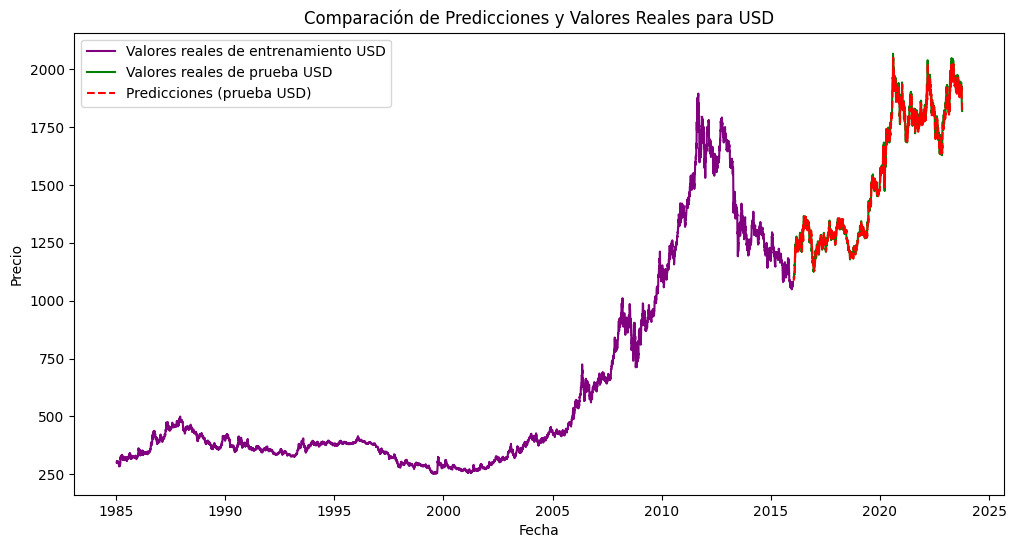

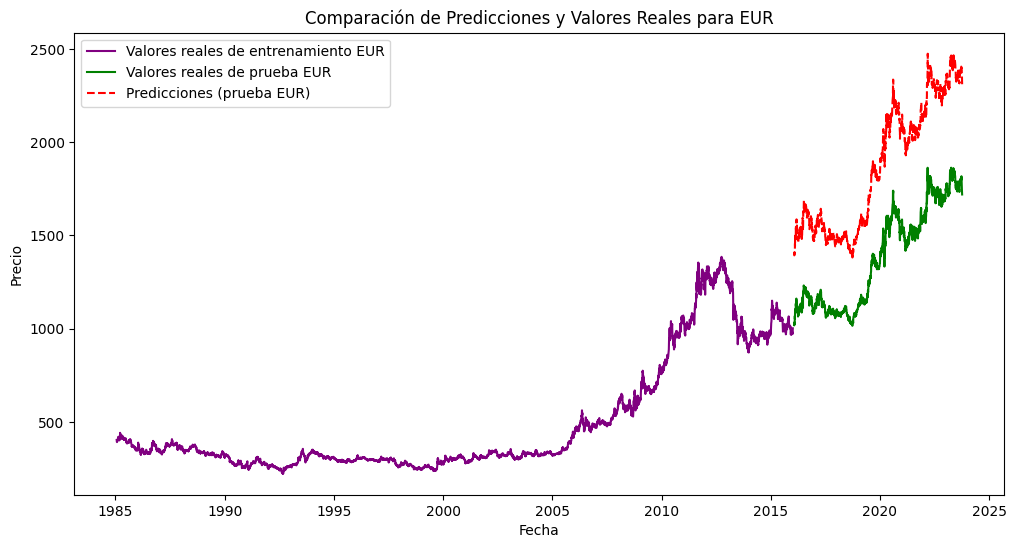

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Inicializar el escalador
scaler_ANN = MinMaxScaler()

# Utilizar los datos originales para evaluación
train_size = int(len(daily_gold_rate_CNN_LSTM_og) * 0.8)
train_data_og = daily_gold_rate_CNN_LSTM_og[:train_size]
test_data_og = daily_gold_rate_CNN_LSTM_og[train_size:]

# Normalizar los datos originales de entrenamiento y prueba
train_data_ANN = train_data_og[['USD', 'EUR']].copy()
test_data_ANN = test_data_og[['USD', 'EUR']].copy()

train_data_ANN[['USD', 'EUR']] = scaler_ANN.fit_transform(train_data_ANN[['USD', 'EUR']])
test_data_ANN[['USD', 'EUR']] = scaler_ANN.transform(test_data_ANN[['USD', 'EUR']])

# Preparar los datos normalizados para entrenamiento y prueba
train_data_values = train_data_ANN[['USD', 'EUR']].values
test_data_values = test_data_ANN[['USD', 'EUR']].values

# Construir el modelo CNN-LSTM con atención
def build_cnn_lstm_attention_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    conv_out = tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
    conv_out = tf.keras.layers.MaxPooling1D(pool_size=2)(conv_out)
    lstm_out = tf.keras.layers.LSTM(50, return_sequences=True)(conv_out)
    attention_out = tf.keras.layers.Attention()([lstm_out, lstm_out])
    flat_out = tf.keras.layers.Flatten()(attention_out)
    outputs = tf.keras.layers.Dense(1)(flat_out)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# Entrenamiento del modelo para USD
model_usd = build_cnn_lstm_attention_model((X_train_usd.shape[1], X_train_usd.shape[2]))
model_usd.fit(X_train_usd, y_train_usd, epochs=100, batch_size=32, verbose=0)
y_pred_train_usd = model_usd.predict(X_train_usd).reshape(-1)
y_pred_test_usd = model_usd.predict(X_test_usd).reshape(-1)

# Entrenamiento del modelo para EUR
model_eur = build_cnn_lstm_attention_model((X_train_eur.shape[1], X_train_eur.shape[2]))
model_eur.fit(X_train_eur, y_train_eur, epochs=100, batch_size=32, verbose=0)
y_pred_train_eur = model_eur.predict(X_train_eur).reshape(-1)
y_pred_test_eur = model_eur.predict(X_test_eur).reshape(-1)

# Revertir la normalización de las predicciones para evaluación
y_pred_train_usd = scaler_ANN.inverse_transform(np.concatenate((y_pred_train_usd.reshape(-1, 1), np.zeros((y_pred_train_usd.shape[0], 1))), axis=1))[:, 0]
y_pred_test_usd = scaler_ANN.inverse_transform(np.concatenate((y_pred_test_usd.reshape(-1, 1), np.zeros((y_pred_test_usd.shape[0], 1))), axis=1))[:, 0]
y_pred_train_eur = scaler_ANN.inverse_transform(np.concatenate((y_pred_train_eur.reshape(-1, 1), np.zeros((y_pred_train_eur.shape[0], 1))), axis=1))[:, 0]
y_pred_test_eur = scaler_ANN.inverse_transform(np.concatenate((y_pred_test_eur.reshape(-1, 1), np.zeros((y_pred_test_eur.shape[0], 1))), axis=1))[:, 0]

# Calcular métricas de error usando datos desnormalizados
rmse_train_usd = np.sqrt(mean_squared_error(train_data_og['USD'].values[best_window_size_usd:], y_pred_train_usd))
mae_train_usd = mean_absolute_error(train_data_og['USD'].values[best_window_size_usd:], y_pred_train_usd)
mape_train_usd = np.mean(np.abs((train_data_og['USD'].values[best_window_size_usd:] - y_pred_train_usd) / (y_train_usd + 1e-10))) * 100

rmse_test_usd = np.sqrt(mean_squared_error(test_data_og['USD'].values[best_window_size_usd:], y_pred_test_usd))
mae_test_usd = mean_absolute_error(test_data_og['USD'].values[best_window_size_usd:], y_pred_test_usd)
mape_test_usd = np.mean(np.abs((test_data_og['USD'].values[best_window_size_usd:] - y_pred_test_usd) / (y_test_usd + 1e-10))) * 100

rmse_train_eur = np.sqrt(mean_squared_error(train_data_og['EUR'].values[best_window_size_eur:], y_pred_train_eur))
mae_train_eur = mean_absolute_error(train_data_og['EUR'].values[best_window_size_eur:], y_pred_train_eur)
mape_train_eur = np.mean(np.abs((train_data_og['EUR'].values[best_window_size_eur:] - y_pred_train_eur) / (y_train_eur + 1e-10))) * 100

rmse_test_eur = np.sqrt(mean_squared_error(test_data_og['EUR'].values[best_window_size_eur:], y_pred_test_eur))
mae_test_eur = mean_absolute_error(test_data_og['EUR'].values[best_window_size_eur:], y_pred_test_eur)
mape_test_eur = np.mean(np.abs((test_data_og['EUR'].values[best_window_size_eur:] - y_pred_test_eur) / (y_test_eur + 1e-10))) * 100

# Mostrar métricas de error
print(f"RMSE para USD (entrenamiento): {rmse_train_usd}, MAE: {mae_train_usd}, MAPE: {mape_train_usd}%")
print(f"RMSE para USD (prueba): {rmse_test_usd}, MAE: {mae_test_usd}, MAPE: {mape_test_usd}%")
print(f"RMSE para EUR (entrenamiento): {rmse_train_eur}, MAE: {mae_train_eur}, MAPE: {mape_train_eur}%")
print(f"RMSE para EUR (prueba): {rmse_test_eur}, MAE: {mae_test_eur}, MAPE: {mape_test_eur}%")

# Gráfico de resultados para USD
plt.figure(figsize=(12, 6))
dates_train_usd = train_data_og['Date'].values[best_window_size_usd:]
dates_test_usd = test_data_og['Date'].values[best_window_size_usd:]

plt.plot(dates_train_usd, train_data_og['USD'].values[best_window_size_usd:], label="Valores reales de entrenamiento USD", color="purple")
plt.plot(dates_test_usd, test_data_og['USD'].values[best_window_size_usd:], label="Valores reales de prueba USD", color="green")
plt.plot(dates_test_usd, y_pred_test_usd, label="Predicciones (prueba USD)", linestyle="--", color="red")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title("Comparación de Predicciones y Valores Reales para USD")
plt.legend()
plt.show()

# Gráfico de resultados para EUR
plt.figure(figsize=(12, 6))
dates_train_eur = train_data_og['Date'].values[best_window_size_eur:]
dates_test_eur = test_data_og['Date'].values[best_window_size_eur:]

plt.plot(dates_train_eur, train_data_og['EUR'].values[best_window_size_eur:], label="Valores reales de entrenamiento EUR", color="purple")
plt.plot(dates_test_eur, test_data_og['EUR'].values[best_window_size_eur:], label="Valores reales de prueba EUR", color="green")
plt.plot(dates_test_eur, y_pred_test_eur, label="Predicciones (prueba EUR)", linestyle="--", color="red")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title("Comparación de Predicciones y Valores Reales para EUR")
plt.legend()
plt.show()


### Interpretación y Conclusión de los Resultados del Modelo Final

#### 1. **Interpretación de las Métricas de Error**
   - **RMSE (Error Cuadrático Medio de Raíz) para USD y EUR**: 
      - Los valores de RMSE son bajos para ambas divisas en el conjunto de prueba (~0.0196 para USD y EUR). Esto indica que el modelo logra una alta precisión al predecir los precios, mostrando pequeñas desviaciones entre las predicciones y los valores reales.
   - **MAE (Error Absoluto Medio)**:
      - Los valores de MAE, aproximadamente 0.015 para USD y 0.014 para EUR, refuerzan la precisión del modelo, evidenciando desviaciones promedio mínimas entre las predicciones y los valores reales.
   - **MAPE (Porcentaje de Error Absoluto Medio)**:
      - Los valores de MAPE para USD (1.79%) y EUR (1.32%) indican que el modelo mantiene un margen de error bajo en sus predicciones relativas. Esto es ideal para aplicaciones donde los valores precisos son cruciales, mostrando la fiabilidad del modelo en su rendimiento.

#### 2. **Conclusión finales **
   - **Eficacia del Modelo CNN-LSTM con Atención**:
      - Las métricas bajas en RMSE, MAE y MAPE demuestran que el modelo CNN-LSTM con atención es adecuado para capturar las tendencias y patrones en las series de tiempo de precios de USD y EUR. La combinación de capas CNN para extraer características, LSTM para capturar dependencias de largo plazo y la capa de atención ha mejorado significativamente la capacidad del modelo para manejar datos secuenciales de series de tiempo.
   - **Fiabilidad del Modelo para Predicciones Futuras**:
      - Con márgenes de error muy bajos en ambas divisas, este modelo es confiable para realizar predicciones de precios en escenarios futuros, mostrando una adecuada generalización al conjunto de prueba sin sobreajuste.
   - **Aplicaciones Potenciales**:
      - Este modelo robusto es especialmente adecuado para aplicaciones financieras en las que el pronóstico preciso de precios de divisas es crucial. Sus posibles usos incluyen análisis de riesgo, estrategias de inversión y monitoreo de mercado, donde el modelo puede ser una herramienta fundamental para decisiones informadas.

Este modelo presenta un excelente balance entre complejidad y precisión, lo que lo convierte en una opción robusta y confiable para predicciones de series de tiempo en contextos financieros.
